In [1]:
pip install qrcode[pil] svglib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.9/913.9 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.5 MB/s eta 0:00:00
  Created wheel for svglib: filename=svglib-1.5.1-py3-none-any.whl size=30907 sha256=8404ece3fdea8fff7024ebd51cd16f44ead11f1b342ae92be0b6b80ade463423
  Stored in directory: /root/.cache/pip/wheels/56/9f/90/f37f4b9dbf82987a24ae14f15586e96715cb669a4710b3b85d
Successfully built svglib


In [2]:
!pip install qrcode[pil] pillow matplotlib

QR code saved as custom_qr_code.png


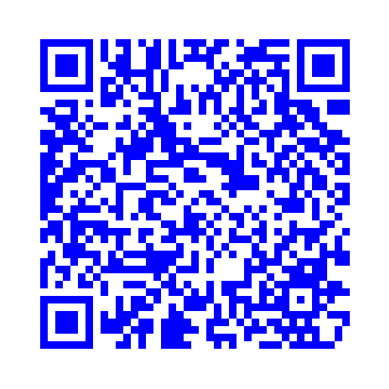

QR code saved as custom_qr_code.png


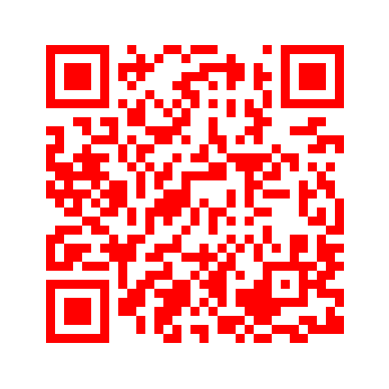

QR code saved as custom_qr_code.jpeg


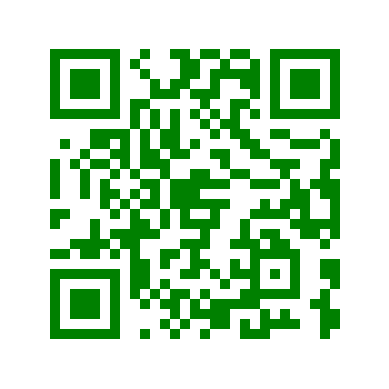

QR code saved as custom_qr_code.svg


In [3]:
import qrcode
from qrcode.image.svg import SvgImage
from qrcode.image.pil import PilImage
from PIL import Image
import matplotlib.pyplot as plt

def generate_qr_code(data_type, data, fill_color="black", back_color="white", add_logo=False, logo_path=None, save_format="PNG"):
    """
    Generate a customized QR code based on provided parameters.

    Parameters:
    - data_type: Type of data (URL, email, phone, WiFi).
    - data: The data to encode in the QR code.
    - fill_color: Color of the QR code.
    - back_color: Background color of the QR code.
    - add_logo: Boolean, if True, adds a logo to the QR code.
    - logo_path: Path to the logo image file.
    - save_format: Format to save the QR code (PNG, JPEG, SVG).
    """

    # Prepare data based on the type
    if data_type.lower() == 'url':
        qr_data = data
    elif data_type.lower() == 'email':
        qr_data = f"mailto:{data}"
    elif data_type.lower() == 'phone':
        qr_data = f"tel:{data}"
    elif data_type.lower() == 'wifi':
        ssid, password, security = data
        qr_data = f"WIFI:T:{security};S:{ssid};P:{password};;"
    else:
        raise ValueError("Unsupported data type. Choose from URL, email, phone, or WiFi.")

    # Create QR code
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,  # High error correction for logo support
        box_size=10,
        border=4,
    )
    qr.add_data(qr_data)
    qr.make(fit=True)

    # SVG-specific handling
    if save_format.lower() == "svg":
        img = qr.make_image(image_factory=SvgImage)
        img_path = "custom_qr_code.svg"
        img.save(img_path)
        print(f"QR code saved as {img_path}")
        return  # SVG doesn't need further processing or display

    # Create raster image (PNG, JPEG) format
    img = qr.make_image(fill_color=fill_color, back_color=back_color)

    # Add logo if specified
    if add_logo and logo_path is not None:
        try:
            logo = Image.open(logo_path)
            base_width = img.size[0] // 5  # Logo size will be 1/5th of QR code size
            wpercent = (base_width / float(logo.size[0]))
            hsize = int((float(logo.size[1]) * float(wpercent)))
            logo = logo.resize((base_width, hsize), Image.ANTIALIAS)

            # Calculate positioning
            pos = ((img.size[0] - logo.size[0]) // 2, (img.size[1] - logo.size[1]) // 2)
            img.paste(logo, pos, mask=logo)
        except FileNotFoundError:
            print("Logo file not found. Continuing without logo.")

    # Save the QR code in raster format
    img_path = f"custom_qr_code.{save_format.lower()}"
    img.save(img_path, format=save_format)
    print(f"QR code saved as {img_path}")

    # Display the QR code image using Matplotlib
    plt.imshow(img, cmap='Greys')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

# Example Variations

# 1. URL QR Code (PNG)
generate_qr_code(
    data_type="url",
    data="https://www.linkedin.com/in/ananmay-anand-581b00219/",
    fill_color="blue",
    back_color="white",
    add_logo=True,
    logo_path=None,  # Replace with 'path/to/your/logo.png' if you have a logo
    save_format="PNG"
)

# 2. Email QR Code (PNG)
generate_qr_code(
    data_type="email",
    data="ananyanigam112@gmail.com",
    fill_color="red",
    back_color="white",
    add_logo=False,  # No logo for this variation
    save_format="PNG"
)

# 3. Phone Number QR Code (JPEG)
generate_qr_code(
    data_type="phone",
    data="+91 8175903419",
    fill_color="green",
    back_color="white",
    add_logo=False,  # No logo for this variation
    save_format="JPEG"  # Use 'JPEG' instead of 'JPG'
)

# 4. WiFi QR Code (SVG)
generate_qr_code(
    data_type="wifi",
    data=("MySSID", "MyPassword", "WPA"),
    fill_color="black",
    back_color="white",
    add_logo=False,  # No logo for this variation
    save_format="SVG"  # Corrected to support SVG output
)